# Create a a *pseudo* 3D survey from 2D lines
This notebook will propose to create a 'pseudo3D' survey. It is a convenient way of inverting a set of 2D lines and vizualizing them together in a 3D setup. Note that this is *not* a 3D inversion, just a 3D visualization of a set of 2D surveys.

API methods:
- `Project.createPseudo3DSurvey()` : creates new pseudo 3D survey, supply input several input files corresponding to 2D lines and `ftype` (similar to `Project.createBatchSurvey()`.
- `Project.createMultiMesh()` : creates the multiple 2D meshes
- `Project.importPseudo3DElec()` : import electrodes as .csv *with 3D-like labels*
- `Project.showPseudo3DMesh()` : show 2D meshes in a 3D grid
- `Project.invertPseudo3D()` : invert the pseudo 3D mesh
- `Project.showPseudo3DResults()` : show the 2D inverted survey into a 3D pyvista plotter

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder
testdir = '../src/examples/'
from resipy import Project

In [4]:
k = Project(typ='R2') # note that it is fundamentally a set of 2D surveys
k.createPseudo3DSurvey(testdir + 'dc-2d-timelapse/data', lineSpacing=1,
                 ftype='Syscal')

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
4/4 imported
Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy/invdir/17031501
308/344 reciprocal measurements found.
0 measurements error > 20 %
Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy/invdir/17040301
308/344 reciprocal measurements found.
0 measurements error > 20 %
Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy/invdir/17051601
308/344 reciprocal measurements found.
0 measurements error > 20 %
Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy/invdir/17051601_incomplete
266/314 reciprocal measurements found.
0 measurements error > 20 %
1190/1346 reciprocal measurements found.
0 measurements error > 20 %


Error model is R_err = 0.004 R_avg^1.235 (R^2 = 0.990)
Error model is R_err = 0.005 R_avg^1.122 (R^2 = 0.992)
Error model is R_err = 0.006 R_avg^0.954 (R^2 = 0.980)
Error model is R_err = 0.006 R_avg^0.995 (R^2 = 0.973)


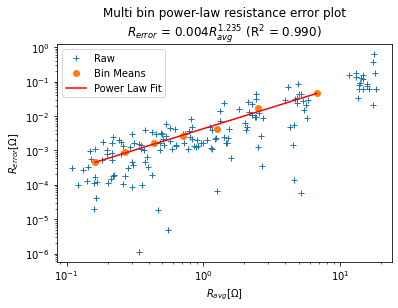

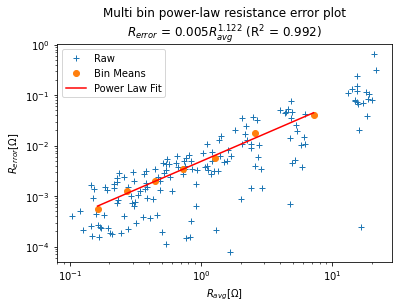

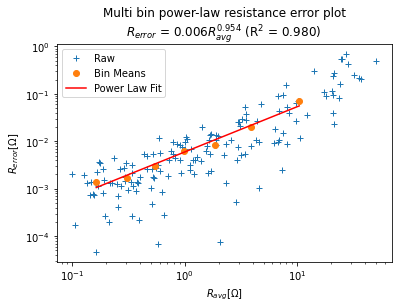

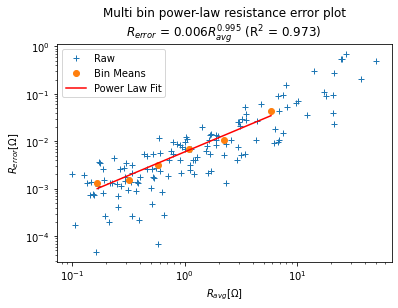

In [5]:
# filtering options and other works as expected for batch survey
k.fitErrorPwl()

In [6]:
# load 3D-like labels for elec positions of all lines
k.importPseudo3DElec(testdir + 'dc-2d-timelapse/elec3pseudo3D.csv')
k.elec # note the 3D-like 'label' column 
# with a line and an electrode number separated by a space

,x,y,z,remote,buried,label
0,0.00,0.0,0.0,False,False,1 1
1,0.25,0.0,0.0,False,False,1 2
2,0.50,0.0,0.0,False,False,1 3
3,0.75,0.0,0.0,False,False,1 4
4,1.00,0.0,0.0,False,False,1 5
...,...,...,...,...,...,...
91,4.75,3.0,0.0,False,False,4 20
92,5.00,3.0,0.0,False,False,4 21
93,5.25,3.0,0.0,False,False,4 22
94,5.50,3.0,0.0,False,False,4 23


In [7]:
k.createMultiMesh(typ='trian', runParallel=True)

Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
ResIPy Estimated RAM usage = 0.003675 Gb
done
Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
ResIPy Estimated RAM usage = 0.003675 Gb
done
Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
ResIPy Estimated RAM usage = 0.003675 Gb
done
Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading n

The 2D meshes can be viewed in 3D using `showPseudo3DMesh()` (requires pyvista).

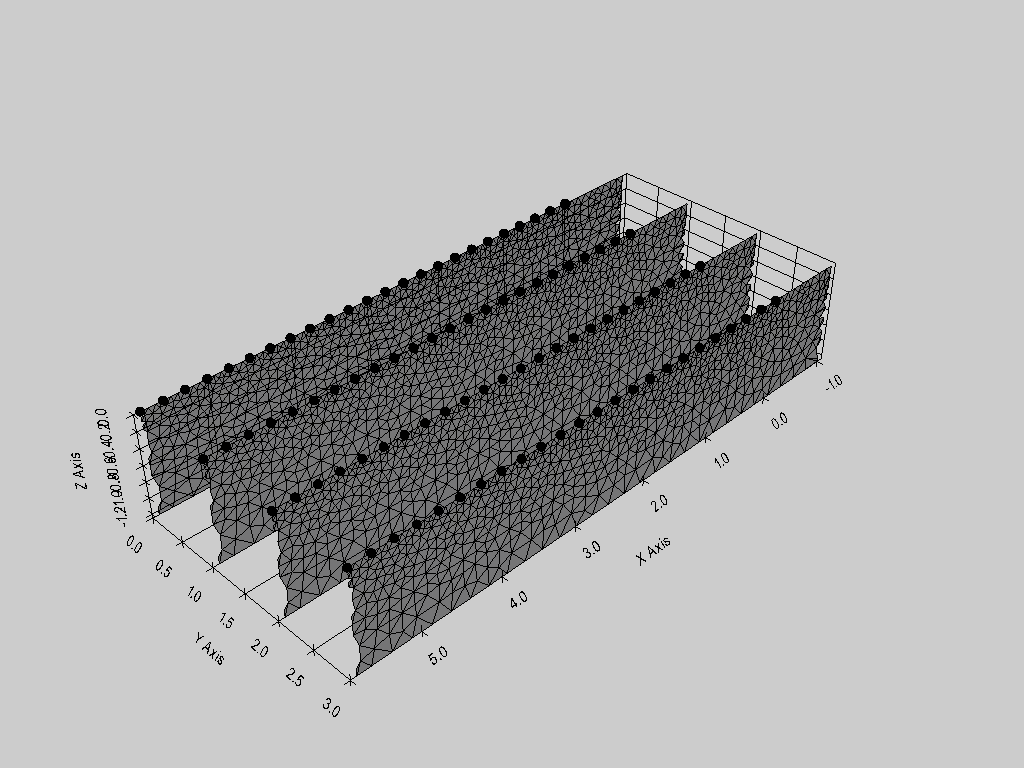

In [9]:
k.showPseudo3DMesh(cropMesh=True) # only works with pyvista

Writing .in file and protocol.dat for 17031501 survey... done!
Writing .in file and protocol.dat for 17040301 survey... done!
Writing .in file and protocol.dat for 17051601 survey... done!
Writing .in file and protocol.dat for 17051601_incomplete survey... done!
________________System-Check__________________
Kernel type: Linux
Processor info: 
4 Threads at <= 2900.0 Mhz
Total memory = 7.7 Gb (usage = 67.1)
Wine version = 4.0
4/4 inversions completedERSION BEGINS ----------
1/1 results parsed (1 ok; 0 failed)
1/1 results parsed (1 ok; 0 failed)
1/1 results parsed (1 ok; 0 failed)
1/1 results parsed (1 ok; 0 failed)
----------- END OF INVERSION IN // ----------


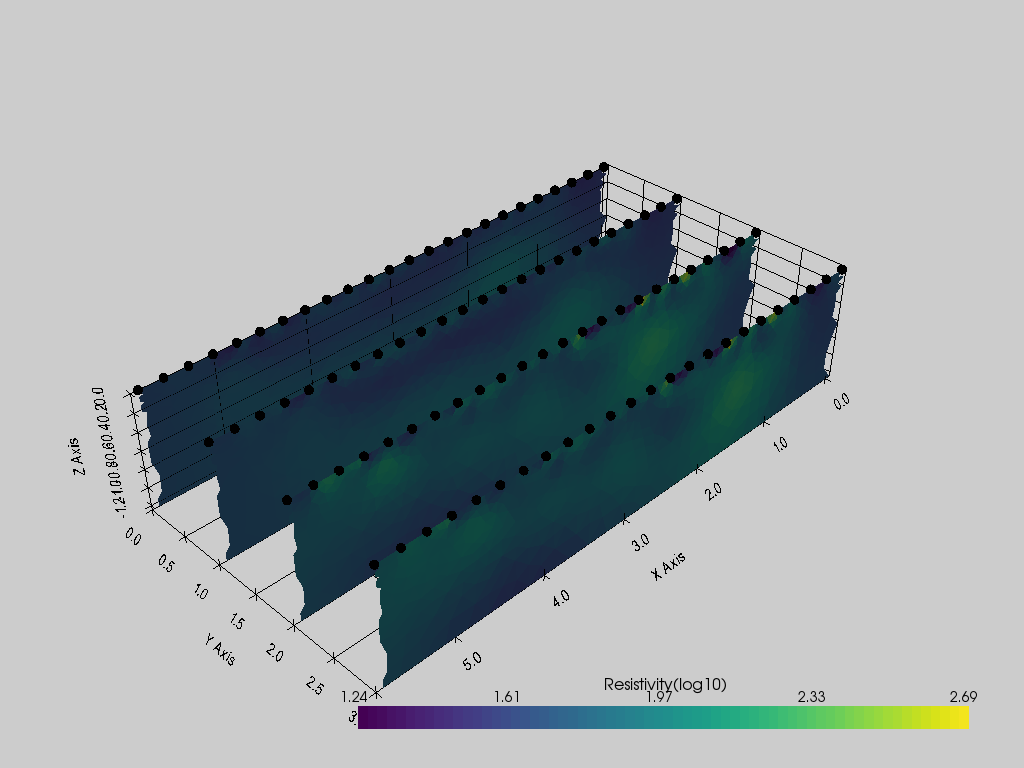

In [8]:
k.invertPseudo3D(runParallel=True)
k.showResults(index=-1, cropMesh=True) # only works with pyvista